# Histogram

Histogram sebagai grafik atau plot, yang memberi gambaran keseluruhan tentang distribusi intensitas gambar. Plot bernilai pixel (mulai dari 0 hingga 255, tidak selalu) dalam sumbu X dan jumlah piksel yang sesuai pada gambar pada sumbu Y.

![alt text](Histogram.png "Title")

## PLOTING HISTOGRAM DENGAN MATPLOTLIB

# plt.hist(img_vec, bins = 256, color, alpha)

1. img_vec: vektor image yang akan di buat grafik, img.ravel() perintah memberi  vektor berisi semua piksel gambar yang tersusun

2. color: Ini adalah warna yang ingin  gunakan untuk merencanakan histogram. Secara default, ini berwarna biru tua. Anda dapat menentukannya sebagai Merah, Biru, Hijau, Kuning, agenta, atau warna standar lainnya.

3. bins: Ini adalah jumlah batang yang ingin kami tampilkan pada sumbu X. Kita tahu bahwa intensitas piksel berkisar dari 0 hingga 255, dan jika kita ingin memvisualisasikan secara terpisah jumlah piksel untuk setiap intensitas yang mungkin, kita memerlukan grafik yang menunjukkan interval 0-255 sebagai 256 batang terpisah. Oleh karena itu, kita akan menyimpan bins = 256. Jika Anda tidak menentukan bins, Python akan memperlakukannya sebagai 10 secara default (dalam contoh berikut, kita akan melihat artinya).

4. alpha: Ini adalah tingkat transparansi yang ingin Anda gambar histogram.

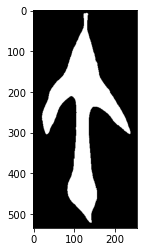

In [1]:
import cv2
import matplotlib.pyplot as plt
gbr=cv2.imread('daun_bin.tif',1)


# Tampilkan gambar matplotlib
plt.imshow(gbr)
plt.show()

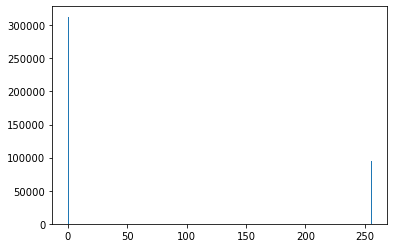

In [2]:
# Tampilkan grafik gambar hitam putih matplotlib
plt.hist(gbr.ravel(),256,[0,256]);plt.show()

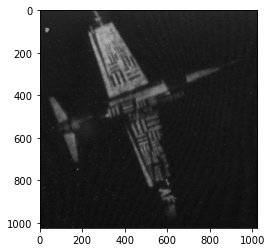

<function matplotlib.pyplot.show(close=None, block=None)>

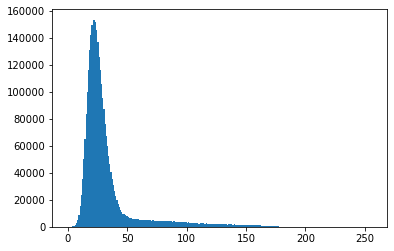

In [3]:
gbr=cv2.imread('pesawat.jpg',1)
plt.imshow(gbr)
plt.show()

# Tampilkan grafik gambar hitam keputihan matplotlib
plt.hist(gbr.ravel(),256,[0,256]);plt.show

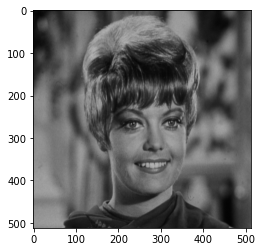

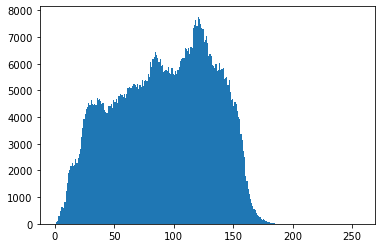

In [4]:
gbr=cv2.imread('zelda.png',1)
plt.imshow(gbr)
plt.show()

# Tampilkan grafik gambar hitam keabuan
plt.hist(gbr.ravel(),256,[0,256]);plt.show()

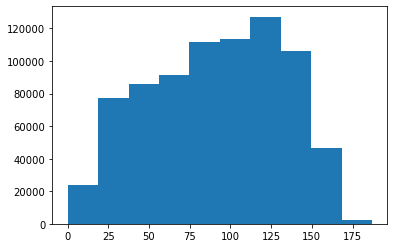

In [5]:
# Tampilkan grafik gambar hitam keabuan bin defaul (10 balok)
plt.hist(gbr.ravel());plt.show()

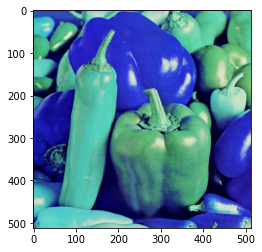

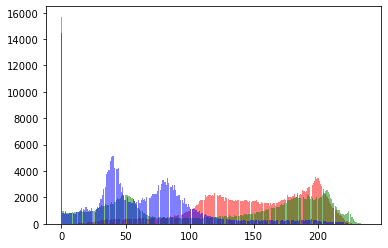

In [6]:
# histogram gambar warna
gbr= cv2.imread('peppers.png')
plt.imshow(gbr)
plt.show()

# tampilkan grafik untuk warna merah
im= gbr[:, :, 2]
plt.hist(im.ravel(), bins = 256, color = 'Red', alpha = 0.5)

# tampilkan grafik untuk warna hijau
im= gbr[:, :, 1]
plt.hist(im.ravel(), bins = 256, color = 'Green', alpha = 0.5)

# tampilkan grafik untuk warna biru
im= gbr[:, :, 0]
plt.hist(im.ravel(), bins = 256, color = 'Blue', alpha = 0.5)

plt.show()

## PLOTING HISTOGRAM DENGAN OPENCV

# openCV fungsi : cv2.calcHist

cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Dimana:
1. images : gambar sumber tipe uint8 atau float32. itu harus diberikan dalam tanda kurung siku, yaitu, "[img]".

2. channels : itu juga diberikan dalam tanda kurung siku. adalah indeks saluran  hitung histogramnya. Misalnya, jika input berupa citra grayscale, nilainya [0]. Untuk citra berwarna, Anda dapat menggunakan [0], [1] atau [2] untuk menghitung histogram saluran biru, hijau, atau merah.

3. input adalah gambar grayscale, bernilai  [0]. untuk gambar berwarna, bisa digunakan [0], [1] atau [2] untuk menghitung histogram dari warna biru, hijau atau mereah.

4. mask : gambar topeng. jika menggunakan histogram dari gambar keseluruhan, mask tidak digunakan. Tetapi jika Anda ingin mencari histogram dari wilayah gambar tertentu, Anda harus membuat gambar topeng untuk itu dan memberikannya sebagai topeng. 

5. histSize : merepresentasikan  BIN count. untuk skala penuh [256]. 

6. ranges : range, normalnya [0,256].

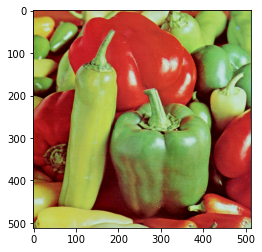

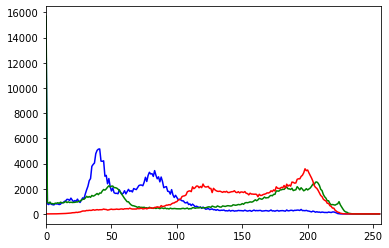

In [7]:
gbr=cv2.imread('peppers.png')

# konversi gmbar bgr openCV ke rgb matplotlib
gbr_bgr=cv2.cvtColor(gbr,cv2.COLOR_BGR2RGB)

# tampil gambar
plt.imshow(gbr_bgr)
plt.show()

# indek warna
color = ('b', 'g', 'r')

# lakukan perlulangan untuk warna b, g, r
for i, col in enumerate(color):
# lakukan perhitungan historam untuk tiap warna
    histr=cv2.calcHist([gbr],[i], None, [256],[0,256])

# buat grafik untuk tiap warna
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

# Tampil histogram semua warna
plt.show()

## Mask Histogram

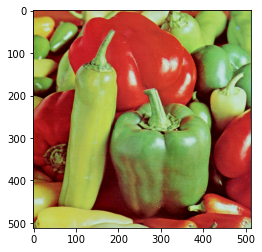

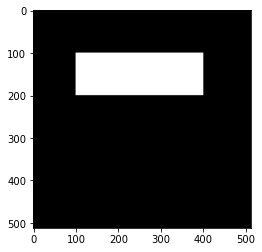

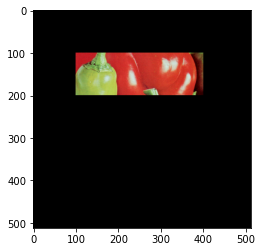

<function matplotlib.pyplot.show(close=None, block=None)>

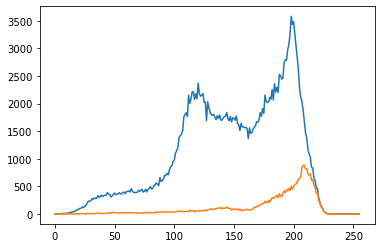

In [8]:
import numpy as np

gbr=cv2.imread('peppers.png')
# konversi gmbar bgr openCV ke rgb matplotlib
gbr_bgr=cv2.cvtColor(gbr,cv2.COLOR_BGR2RGB)
# tampilkan gbr_bgr
plt.imshow(gbr_bgr)
plt.show()

# buat mask
mask=np.zeros(gbr.shape[:2], np.uint8)
mask[100:200, 100:400] = 255
# tampilkan mask
plt.imshow(mask,'gray')
plt.show()

# gabungkan gambar dan mask
mask_gbr=cv2.bitwise_and(gbr_bgr, gbr_bgr, mask = mask)
# tampilkan mask_gbr
plt.imshow(mask_gbr)
plt.show()

# lakukan perhitungan histogram untuk gambar dan masuk
hist_bgr=cv2.calcHist([gbr_bgr],[0],None,[256],[0,256])
hist_mask=cv2.calcHist([gbr_bgr],[0], mask, [256],[0,256])

# Tampilkan grafik histogram gambar dan masuk
plt.plot(hist_bgr)
plt.plot(hist_mask)
plt.show